## pruned and unpruned both


In [6]:
pip install scikit_posthocs


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import scipy.stats as stats
import re
import scikit_posthocs as sp

# Load the CSV file
file_path = "RMSD_ANALYSIS_.csv"  # Ensure this is the correct path
df = pd.read_csv(file_path)
print(f"Data source: {file_path}")

# --- Helper Functions ---
# Function to extract pruned values (numbers within parentheses)
def extract_pruned(value):
    match = re.search(r'\(([^)]+)\)', str(value))
    return float(match.group(1)) if match else None

# Function to extract unpruned values (numbers before the parentheses)
def extract_unpruned(value):
    match = re.search(r'^([^(]+)', str(value))
    return float(match.group(1).strip()) if match else None

# ---------------------------
# --- Pruned Data Analysis ---
# ---------------------------
# Extract pruned data from each relevant column
df["Pruned_Ortholog"] = df["RMSD Exp Vs Hybrid with Ortholog AF Model"].apply(extract_pruned)
df["Pruned_Human"]    = df["RMSD Exp Vs Hybrid with Human AF Model"].apply(extract_pruned)
df["Pruned_AF3"]      = df["RMSD AF3 Vs Experimental Structures"].apply(extract_pruned)
df["Pruned_AF2"]      = df["RMSD AF2 Vs Experimental Structures"].apply(extract_pruned)

print("\nExtracted Pruned Data:")
print(df[["PDB_ID", "Pruned_Ortholog", "Pruned_Human", "Pruned_AF3", "Pruned_AF2"]])

# --- Friedman Test for Pruned Data ---
friedman_pruned = stats.friedmanchisquare(
    df["Pruned_Ortholog"],
    df["Pruned_Human"],
    df["Pruned_AF3"],
    df["Pruned_AF2"]
)
print("\nFriedman Test Results (Pruned Data):")
print(f"Chi-square = {friedman_pruned.statistic:.3f}, P-value = {friedman_pruned.pvalue:.3f}")

# --- Nemenyi Post-hoc Test for Pruned Data ---
data_pruned = df[["Pruned_Ortholog", "Pruned_Human", "Pruned_AF3", "Pruned_AF2"]]
nemenyi_pruned = sp.posthoc_nemenyi_friedman(data_pruned)
print("\nNemenyi Post-hoc Test Results (Pruned Data):")
print(nemenyi_pruned)

# --- Ranking for Pruned Data ---
# Lower RMSD is better; compute the average RMSD for each method
ranking_pruned = data_pruned.mean().sort_values()
print("\nRanking of Methods (Pruned Data, Lower is Better):")
print(ranking_pruned)

# ---------------------------
# --- Unpruned Data Analysis ---
# ---------------------------
# Extract unpruned data from each relevant column
df["Unpruned_Ortholog"] = df["RMSD Exp Vs Hybrid with Ortholog AF Model"].apply(extract_unpruned)
df["Unpruned_Human"]    = df["RMSD Exp Vs Hybrid with Human AF Model"].apply(extract_unpruned)
df["Unpruned_AF3"]      = df["RMSD AF3 Vs Experimental Structures"].apply(extract_unpruned)
df["Unpruned_AF2"]      = df["RMSD AF2 Vs Experimental Structures"].apply(extract_unpruned)

print("\nExtracted Unpruned Data:")
print(df[["PDB_ID", "Unpruned_Ortholog", "Unpruned_Human", "Unpruned_AF3", "Unpruned_AF2"]])

# --- Friedman Test for Unpruned Data ---
friedman_unpruned = stats.friedmanchisquare(
    df["Unpruned_Ortholog"],
    df["Unpruned_Human"],
    df["Unpruned_AF3"],
    df["Unpruned_AF2"]
)
print("\nFriedman Test Results (Unpruned Data):")
print(f"Chi-square = {friedman_unpruned.statistic:.3f}, P-value = {friedman_unpruned.pvalue:.3f}")

# --- Nemenyi Post-hoc Test for Unpruned Data ---
data_unpruned = df[["Unpruned_Ortholog", "Unpruned_Human", "Unpruned_AF3", "Unpruned_AF2"]]
nemenyi_unpruned = sp.posthoc_nemenyi_friedman(data_unpruned)
print("\nNemenyi Post-hoc Test Results (Unpruned Data):")
print(nemenyi_unpruned)

# --- Ranking for Unpruned Data ---
ranking_unpruned = data_unpruned.mean().sort_values()
print("\nRanking of Methods (Unpruned Data, Lower is Better):")
print(ranking_unpruned)


Data source: RMSD_ANALYSIS_.csv

Extracted Pruned Data:
   PDB_ID  Pruned_Ortholog  Pruned_Human  Pruned_AF3  Pruned_AF2
0    6D9H            0.879         0.871       0.938       0.879
1    7AUE            1.126         1.028       1.095       1.028
2    7F4D            1.121         0.922       1.034       0.922
3    7F53            0.949         0.919       0.777       0.914
4    7LD3            0.857         0.905       0.992       0.914
5    7PIU            0.960         0.929       0.804       0.903
6    7WKD            1.008         0.990       1.017       0.930
7    7X1T            1.061         1.060       1.021       1.057
8    8EFB            0.807         0.813       1.018       1.067
9    8F7Q            0.860         0.864       1.107       1.035
10   8F7W            1.105         1.118       1.109       0.858
11   8F7X            0.954         1.032       1.008       1.118
12   8HDO            1.016         1.006       0.959       1.033
13   8HTI            1.022        

## docking analysis

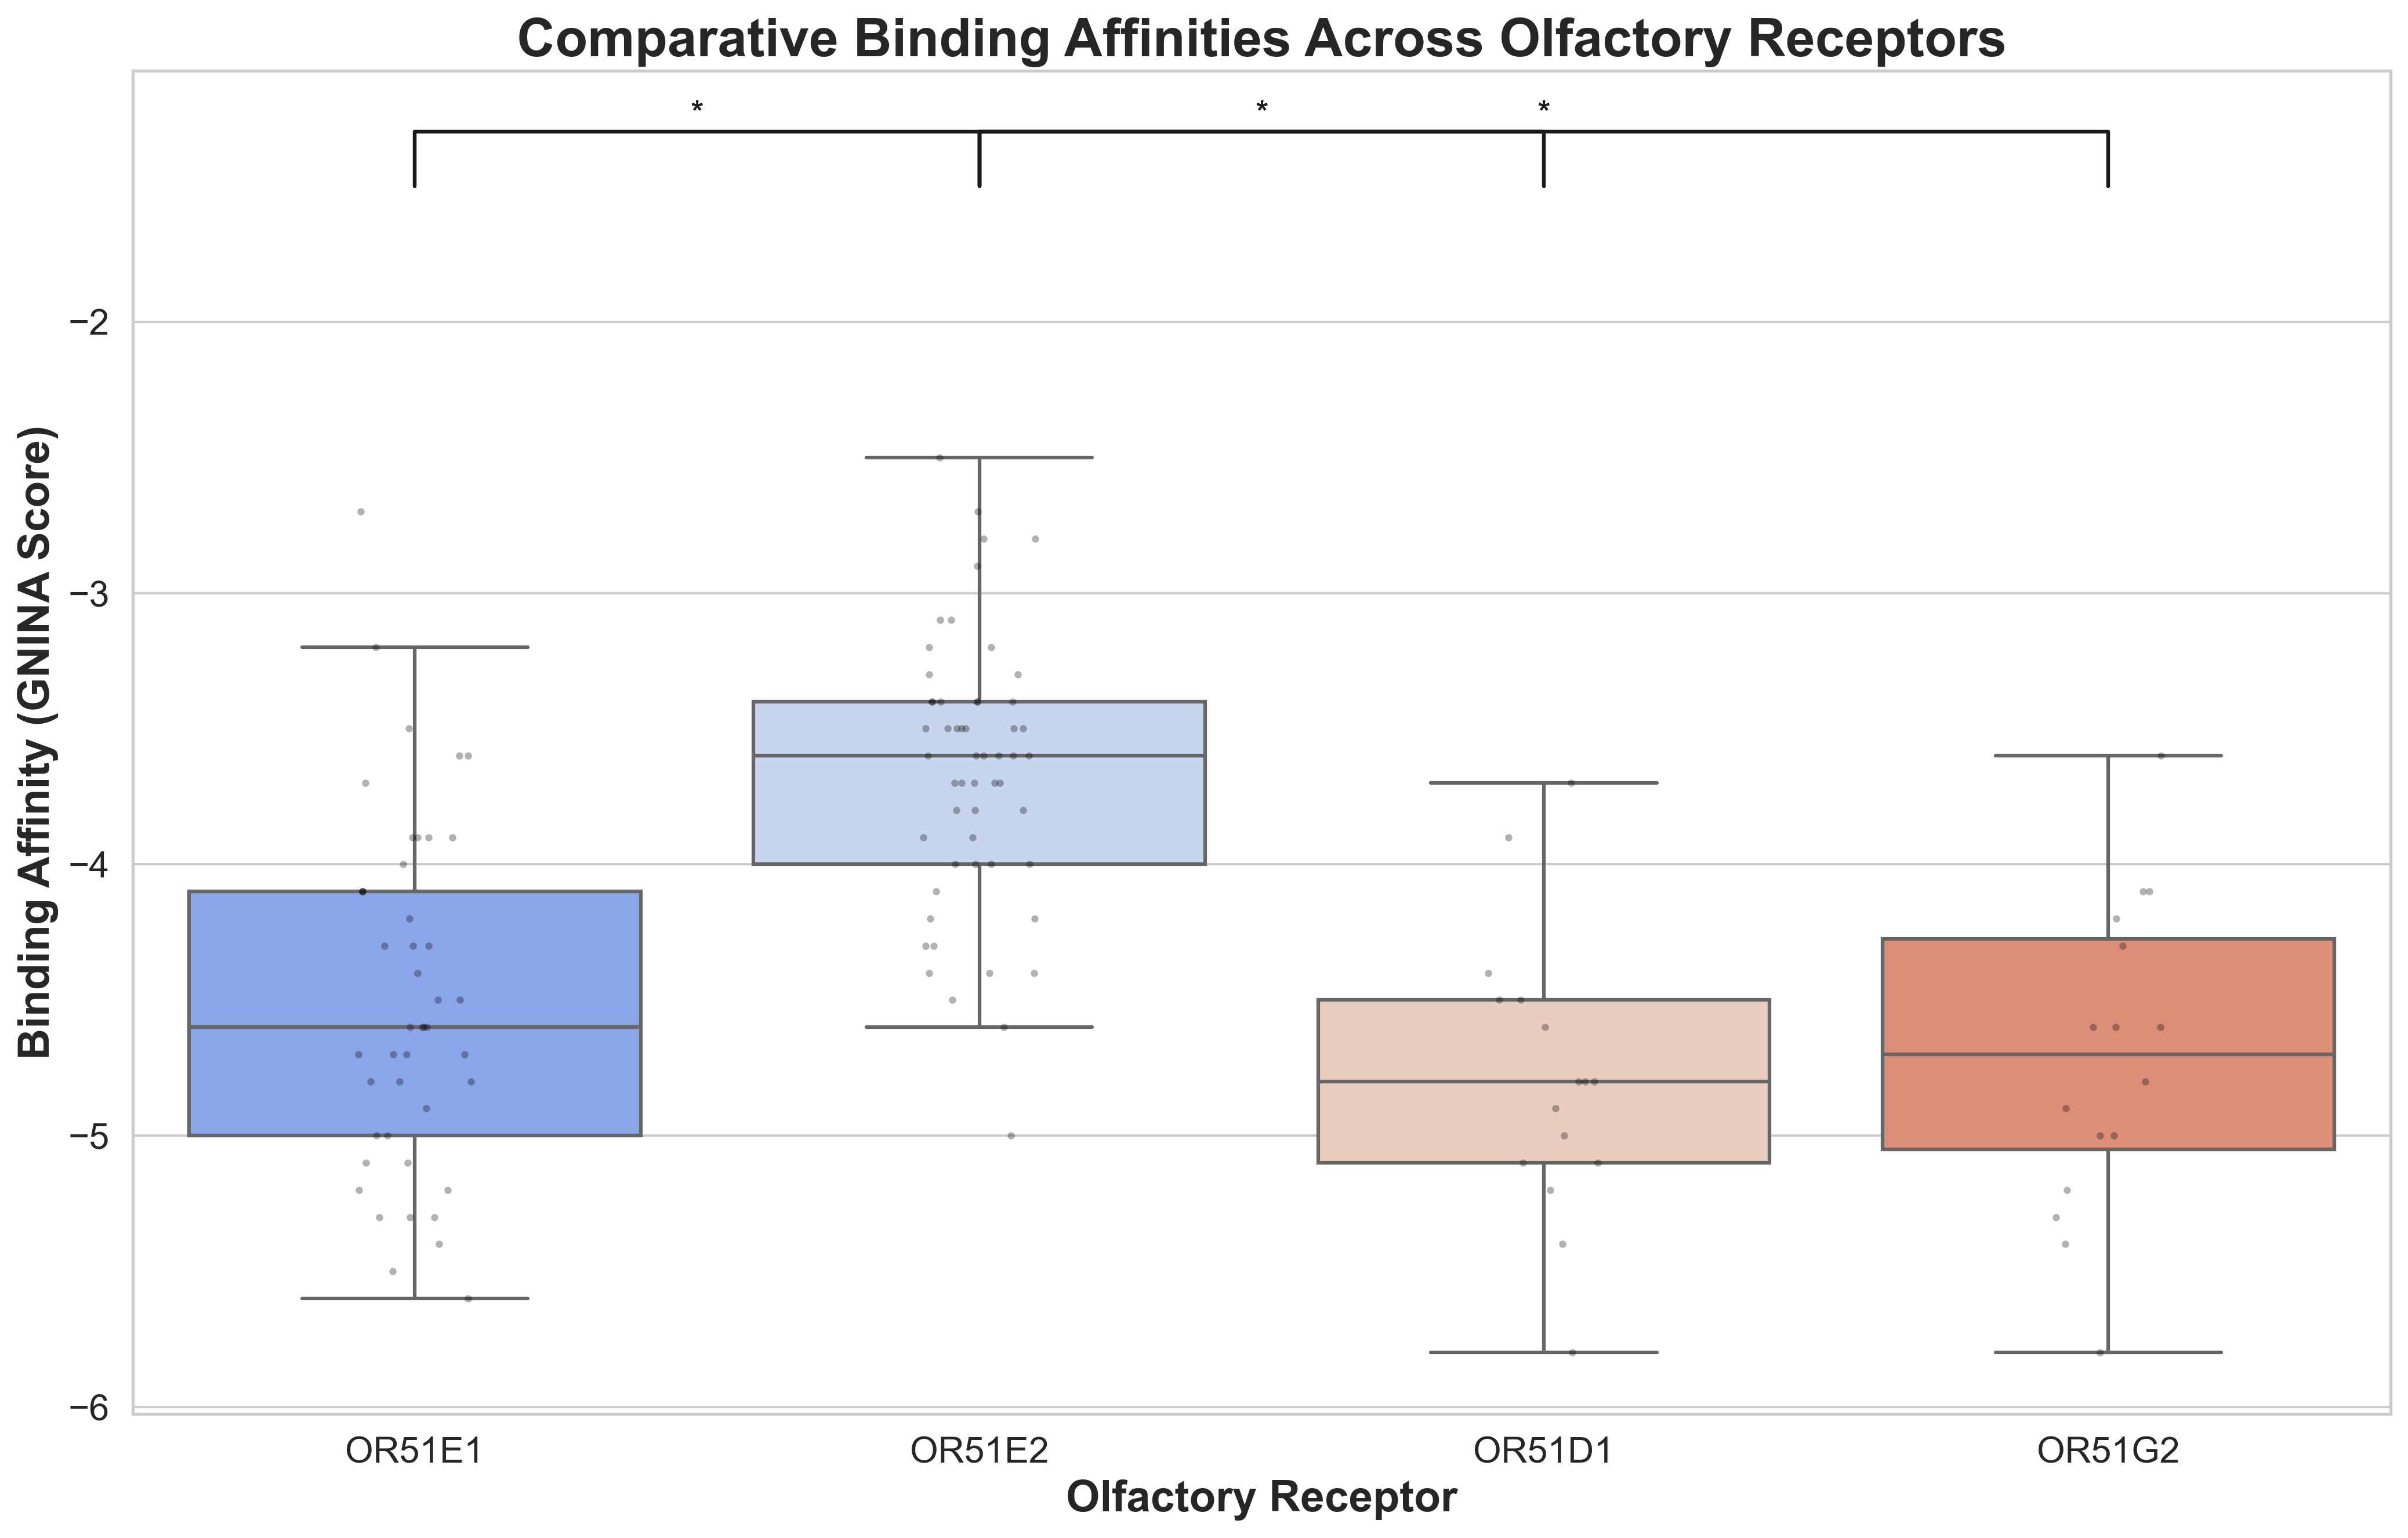

In [23]:
import scikit_posthocs as sp

plt.figure(figsize=(14, 9), dpi=300)  # High DPI for research papers
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.boxplot(data=df, x="Receptor", y="AFFINITY - GNINA", palette="coolwarm", showfliers=False, linewidth=1.5)
sns.stripplot(data=df, x="Receptor", y="AFFINITY - GNINA", color="black", alpha=0.3, size=3, jitter=True)  # Overlay individual data points

plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Olfactory Receptor", fontsize=18, fontweight="bold")
plt.ylabel("Binding Affinity (GNINA Score)", fontsize=18, fontweight="bold")
plt.title("Comparative Binding Affinities Across Olfactory Receptors", fontsize=22, fontweight="bold")

# Post-hoc Dunn's test for statistical significance annotations
if kruskal_gnina.pvalue < 0.05:
    dunn_results = sp.posthoc_dunn(df, val_col="AFFINITY - GNINA", group_col="Receptor", p_adjust="bonferroni")
    significant_pairs = dunn_results[dunn_results < 0.05].stack().index.tolist()
    for i, j in significant_pairs:
        x1, x2 = df["Receptor"].unique().tolist().index(i), df["Receptor"].unique().tolist().index(j)
        y, h, col = df["AFFINITY - GNINA"].max() + 1, 0.2, "k"
        plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
        plt.text((x1 + x2) * 0.5, y + h, "*", ha="center", va="bottom", color=col, fontsize=14)

plt.tight_layout()
plt.show()


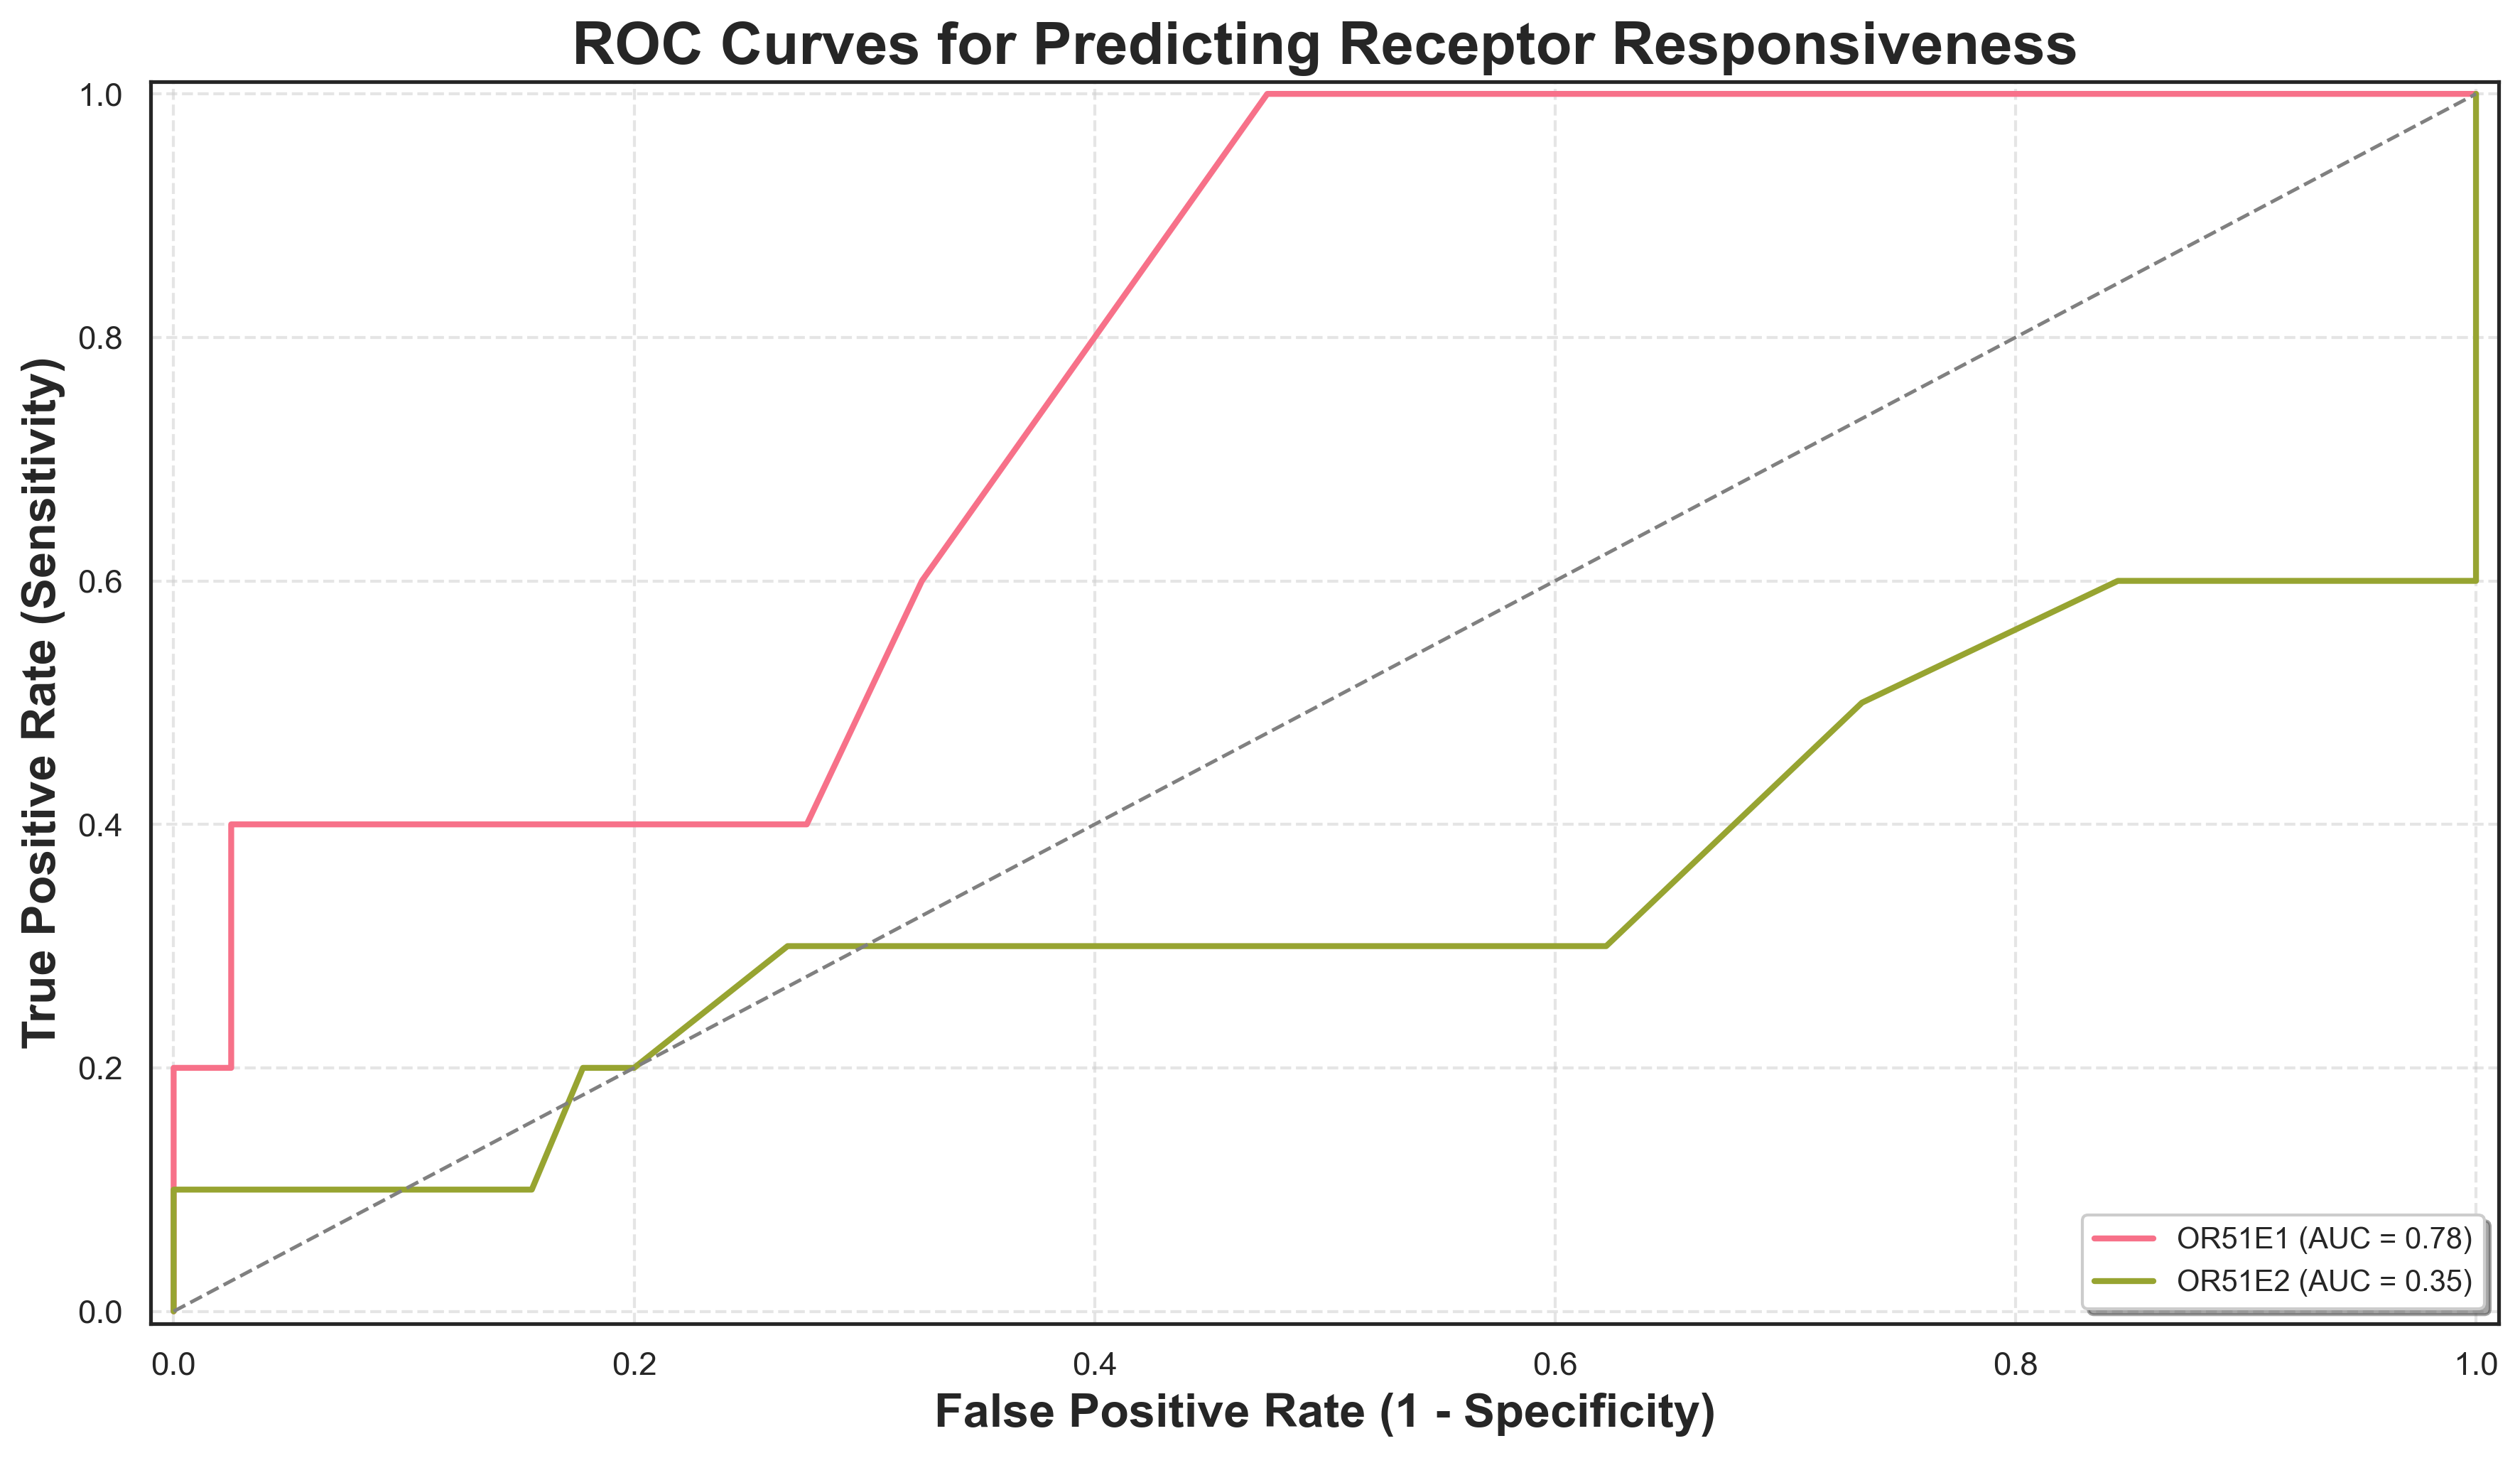

In [27]:
plt.figure(figsize=(12, 7), dpi=300)
sns.set_theme(style="white")

colors = sns.color_palette("husl", n_colors=len(df["Receptor"].unique()))  # Unique colors per receptor

for idx, receptor in enumerate(df["Receptor"].unique()):
    receptor_data = df[df["Receptor"] == receptor]
    
    # Ensure valid ROC analysis
    if receptor_data["Responsiveness - M2OR"].nunique() == 2:  
        fpr, tpr, _ = roc_curve(receptor_data["Responsiveness - M2OR"], -receptor_data["AFFINITY - GNINA"])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{receptor} (AUC = {auc_score:.2f})", color=colors[idx], linewidth=2)

# Formatting
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1.2)  # Random classifier line
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=16, fontweight="bold")
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=16, fontweight="bold")
plt.title("ROC Curves for Predicting Receptor Responsiveness", fontsize=20, fontweight="bold")
plt.legend(loc="lower right", fontsize=10, frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


In [21]:
print("\n=== Kruskal-Wallis Test Results ===")
print(f"GNINA Binding Affinity Comparison: p-value = {kruskal_gnina.pvalue:.3e}")
print(f"Autodock Re-scoring Comparison: p-value = {kruskal_autodock.pvalue:.3e}")

if kruskal_gnina.pvalue < 0.05:
    print("\nSignificant differences found in GNINA scores across receptors. Conducting Dunn’s posthoc test...")

    dunn_results = sp.posthoc_dunn(df, val_col="AFFINITY - GNINA", group_col="Receptor", p_adjust="bonferroni")
    print("\nPosthoc Dunn's Test Results (p-values):")
    print(dunn_results)



=== Kruskal-Wallis Test Results ===
GNINA Binding Affinity Comparison: p-value = 1.725e-12
Autodock Re-scoring Comparison: p-value = 1.514e-12

Significant differences found in GNINA scores across receptors. Conducting Dunn’s posthoc test...

Posthoc Dunn's Test Results (p-values):
              OR51D1        OR51E1        OR51E2    OR51G2
OR51D1  1.000000e+00  1.000000e+00  2.350658e-07  1.000000
OR51E1  1.000000e+00  1.000000e+00  2.774837e-08  1.000000
OR51E2  2.350658e-07  2.774837e-08  1.000000e+00  0.000002
OR51G2  1.000000e+00  1.000000e+00  1.523631e-06  1.000000
